## Figures for the paper

In [1]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
import pandas as pd
import scipy.stats as stats
import netCDF4

In [2]:
# Adding State/Province boundaries with built-in Cartopy features
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

### Figure 1

Elevation between downscaled and GCM grids

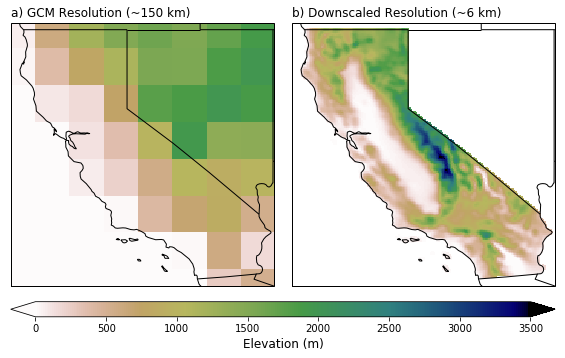

In [41]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# # Same grid CA mask
mask_nc = netCDF4.Dataset(inv_dir+'same_grid_CA_mask.nc')
ca_mask = mask_nc.variables['landmask'][:,:]
mask_nc.close()

# Regridded WRF d02 topography (same resolution as LOCA-WRF and LOCA-Livneh)
wrf_inv_nc = netCDF4.Dataset(inv_dir+'invariant_d02_same_grid.nc')
wrf_hgt = wrf_inv_nc.variables['HGT'][0,:,:]
wrf_lat = wrf_inv_nc.variables['lat'][:]
wrf_lon = wrf_inv_nc.variables['lon'][:]
wrf_inv_nc.close()

# Retain only CA grid cells
wrf_hgt_ca = np.ma.masked_where(ca_mask == 0, wrf_hgt)

# Raw GCM (CNRM-CM5) topography
gcm_inv_nc = xr.open_dataset(inv_dir+'orog_fx_CNRM-CM5_historical_r0i0p0.nc')
gcm_hgt = gcm_inv_nc.variables['orog'][:,:]
gcm_lon = gcm_inv_nc['lon']
gcm_lat = gcm_inv_nc['lat']

# Figure ---
plot_ticks = np.linspace(0,3500,15)

fig = plt.figure(figsize=(8,6))

# Raw GCM
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) GCM Resolution (~150 km)', loc='left', fontsize=12)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
plot1 = ax1.pcolormesh(gcm_lon, gcm_lat, gcm_hgt, transform=ccrs.PlateCarree(), 
                       cmap='gist_earth_r', vmin=0, vmax=3500)
# Obtain the x and y limits to create a sqaure plot
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()
ax1.set_aspect(abs(x1-x0)/abs(y1-y0))

# WRF
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('b) Downscaled Resolution (~6 km)', loc='left', fontsize=12)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
plot2 = ax2.pcolormesh(wrf_lon, wrf_lat, wrf_hgt_ca, 
                     transform=ccrs.PlateCarree(), vmin=0, vmax=3500, cmap='gist_earth_r')
ax2.set_aspect(abs(x1-x0)/abs(y1-y0))

fig.tight_layout()

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()

# Colorbar for all panels
cbar_height = 0.035
cbar_ax = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.1, ax2_pos.x1-ax1_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar = plt.colorbar(plot2, cax=cbar_ax, orientation='horizontal', extend='both') # drawedges=True, extend='both')
# cbar.dividers.set_edgecolor('black')
# cbar.dividers.set_linewidth(1)
cbar.set_label('Elevation (m)', fontsize=12)

#plt.savefig('/Users/nberg/projects/doe/figures/Figure1.jpeg', dpi=300, bbox_inches='tight')

### Figure 2

Historical (1991-2000) April Tmax and Annual PR for (1) WRF, (2) Livneh, (3) LOCA-WRF, and (4) LOCA-Livneh.

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-pa

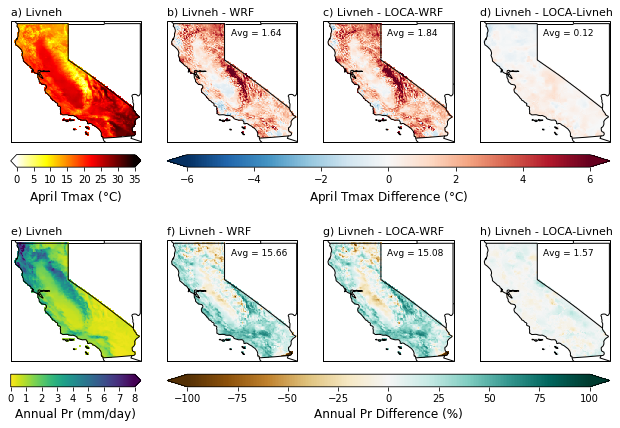

In [57]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

datasets = ['wrf', 'livneh', 'loca_wrf', 'loca_livneh']

# Upper rows: April Tmax
ticks_tmax = np.linspace(0,35,8)
ticks_tmax_diff = np.linspace(-6,6,13)

wrf_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
wrf_tmax = wrf_nc.variables['tmax'][:,:]
lat = wrf_nc.variables['lat'][:]
lon = wrf_nc.variables['lon'][:]
wrf_nc.close()

livneh_nc = netCDF4.Dataset(data_dir+'livneh_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
livneh_tmax = livneh_nc.variables['tmax'][:,:]
livneh_nc.close()

loca_wrf_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_wrf_tmax = loca_wrf_nc.variables['tmax'][:,:]
loca_wrf_nc.close()

loca_livneh_nc = netCDF4.Dataset(data_dir+'loca_livneh_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_livneh_tmax = loca_livneh_nc.variables['tmax'][:,:]
loca_livneh_nc.close()

# Lower rows: Annual Pr
ticks_pr = np.linspace(1,10,10)
ticks_pr_diff = np.linspace(-100,100,11)

wrf_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
wrf_pr = wrf_nc.variables['pr'][:,:]
wrf_nc.close()

livneh_nc = netCDF4.Dataset(data_dir+'livneh_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
livneh_pr = livneh_nc.variables['pr'][:,:]
livneh_nc.close()

loca_wrf_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_wrf_pr = loca_wrf_nc.variables['pr'][:,:]
loca_wrf_nc.close()

loca_livneh_nc = netCDF4.Dataset(data_dir+'loca_livneh_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_livneh_pr = loca_livneh_nc.variables['pr'][:,:]
loca_livneh_nc.close()

# Differences between Livneh and WRF, LOCA-WRF, and LOCA-Livneh
diff_tmax_livneh_wrf = livneh_tmax - wrf_tmax
diff_tmax_livneh_loca_wrf = livneh_tmax - loca_wrf_tmax
diff_tmax_livneh_loca_livneh = livneh_tmax - loca_livneh_tmax

diff_pr_livneh_wrf = ((livneh_pr - wrf_pr) / livneh_pr) * 100.
diff_pr_livneh_loca_wrf = ((livneh_pr - loca_wrf_pr) / livneh_pr) * 100.
diff_pr_livneh_loca_livneh = ((livneh_pr - loca_livneh_pr) / livneh_pr) * 100.

# AVG, MIN, and MAX statistics
# wrf_tmax_real = wrf_tmax[wrf_tmax > -100] # quick way to filter out nans
# wrf_pr_real = wrf_pr[wrf_pr > -100] 
# wrf_tmax_avg, wrf_tmax_min, wrf_tmax_max = np.mean(wrf_tmax_real),np.min(wrf_tmax_real), np.max(wrf_tmax_real)
# wrf_pr_avg, wrf_pr_min, wrf_pr_max = np.mean(wrf_pr_real), np.min(wrf_pr_real), np.max(wrf_pr_real)

# livneh_tmax_real = livneh_tmax[livneh_tmax > -100] 
# livneh_pr_real = livneh_pr[livneh_pr > -100] 
# livneh_tmax_avg, livneh_tmax_min, livneh_tmax_max = np.mean(livneh_tmax_real), np.min(livneh_tmax_real), \
#                 np.max(livneh_tmax_real)
# livneh_pr_avg, livneh_pr_min, livneh_pr_max = np.mean(livneh_pr_real), np.min(livneh_pr_real), np.max(livneh_pr_real)
    
# loca_wrf_tmax_real = loca_wrf_tmax[loca_wrf_tmax > -100] # quick way to filter out nans
# loca_wrf_pr_real = loca_wrf_pr[loca_wrf_pr > -100] 
# loca_wrf_tmax_avg, loca_wrf_tmax_min, loca_wrf_tmax_max = np.mean(loca_wrf_tmax_real), \
#                     np.min(loca_wrf_tmax_real), np.max(loca_wrf_tmax_real)
# loca_wrf_pr_avg, loca_wrf_pr_min, loca_wrf_pr_max = np.mean(loca_wrf_pr_real), \
#                                                 np.min(loca_wrf_pr_real), np.max(loca_wrf_pr_real)

# loca_livneh_tmax_real = loca_livneh_tmax[loca_livneh_tmax > -100] # quick way to filter out nans
# loca_livneh_pr_real = loca_livneh_pr[loca_livneh_pr > -100] 
# loca_livneh_tmax_avg, loca_livneh_tmax_min, loca_livneh_tmax_max = np.mean(loca_livneh_tmax_real), \
#                     np.min(loca_livneh_tmax_real), np.max(loca_livneh_tmax_real)
# loca_livneh_pr_avg, loca_livneh_pr_min, loca_livneh_pr_max = np.mean(loca_livneh_pr_real), \
#                                                 np.min(loca_livneh_pr_real), np.max(loca_livneh_pr_real)


# Mean absolute error statistics --

# # Compute dataset to dataset differences
# diff_wrf_loca_wrf_tmax = wrf_tmax_real - loca_wrf_tmax_real
# diff_wrf_loca_wrf_pr= wrf_pr_real - loca_wrf_pr_real
# diff_livneh_loca_livneh_tmax = livneh_tmax_real - loca_livneh_tmax_real
# diff_livneh_loca_livneh_pr = livneh_pr_real - loca_livneh_pr_real

# # Statistics (mean absolute error)
# mae_diff_wrf_loca_wrf_tmax = np.mean(np.abs(diff_wrf_loca_wrf_tmax))
# mae_diff_wrf_loca_wrf_pr = np.mean(np.abs(diff_wrf_loca_wrf_pr))

# mae_diff_livneh_loca_livneh_tmax = np.mean(np.abs(diff_livneh_loca_livneh_tmax))
# mae_diff_livneh_loca_livneh_pr = np.mean(np.abs(diff_livneh_loca_livneh_pr))


    
# Plot ---     
fig = plt.figure(figsize=(9,7))

ax1 = fig.add_subplot(2,4,1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) Livneh', loc='left', fontsize=11)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
plot1 = ax1.pcolormesh(lon, lat, livneh_tmax,
                       transform=ccrs.PlateCarree(), 
                       vmin=0, vmax=35, cmap='hot_r')

ax2 = fig.add_subplot(2, 4, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('b) Livneh - WRF', loc='left', fontsize=11)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
ax2.text(-119.5, 41, 'Avg = {0:.2f}'.format(np.nanmean(diff_tmax_livneh_wrf)),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
plot2 = ax2.pcolormesh(lon, lat, diff_tmax_livneh_wrf,
                       transform=ccrs.PlateCarree(), 
                       vmin=-6, vmax=6, cmap='RdBu_r')

ax3 = fig.add_subplot(2, 4, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('c) Livneh - LOCA-WRF', loc='left', fontsize=11)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(cfeature.BORDERS)
ax3.set_extent([235.25,246,32.25,42.25])
ax3.text(-119.5, 41, 'Avg = {0:.2f}'.format(np.nanmean(diff_tmax_livneh_loca_wrf)),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
plot3 = ax3.pcolormesh(lon, lat, diff_tmax_livneh_loca_wrf,
                       transform=ccrs.PlateCarree(), 
                       vmin=-6, vmax=6, cmap='RdBu_r')

ax4 = fig.add_subplot(2, 4, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('d) Livneh - LOCA-Livneh', loc='left', fontsize=11)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(cfeature.BORDERS)
ax4.set_extent([235.25,246,32.25,42.25])
ax4.text(-119.5, 41, 'Avg = {0:.2f}'.format(np.nanmean(diff_tmax_livneh_loca_livneh)),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
plot4 = ax4.pcolormesh(lon, lat, diff_tmax_livneh_loca_livneh,
                       transform=ccrs.PlateCarree(), 
                       vmin=-6, vmax=6, cmap='RdBu_r')

ax5 = fig.add_subplot(2, 4, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('e) Livneh', loc='left', fontsize=11)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(cfeature.BORDERS)
ax5.set_extent([235.25,246,32.25,42.25])
plot5 = ax5.pcolormesh(lon, lat, livneh_pr,
                       transform=ccrs.PlateCarree(), 
                       vmin=0, vmax=8, cmap='viridis_r')

ax6 = fig.add_subplot(2, 4, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('f) Livneh - WRF', loc='left', fontsize=11)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(cfeature.BORDERS)
ax6.set_extent([235.25,246,32.25,42.25])
ax6.text(-119.5, 41, 'Avg = {0:.2f}'.format(np.nanmean(diff_pr_livneh_wrf)),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
plot6 = ax6.pcolormesh(lon, lat, diff_pr_livneh_wrf, 
                       transform=ccrs.PlateCarree(), 
                       vmin=-100, vmax=100, cmap='BrBG')

ax7 = fig.add_subplot(2, 4, 7, projection=ccrs.PlateCarree())
ax7.coastlines('50m')
ax7.set_title('g) Livneh - LOCA-WRF', loc='left', fontsize=11)
ax7.add_feature(states_provinces, edgecolor='black')
ax7.add_feature(cfeature.BORDERS)
ax7.set_extent([235.25,246,32.25,42.25])
ax7.text(-119.5, 41, 'Avg = {0:.2f}'.format(np.nanmean(diff_pr_livneh_loca_wrf)),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
plot7 = ax7.pcolormesh(lon, lat, diff_pr_livneh_loca_wrf,
                       transform=ccrs.PlateCarree(), 
                       vmin=-100, vmax=100, cmap='BrBG')

ax8 = fig.add_subplot(2, 4, 8, projection=ccrs.PlateCarree())
ax8.coastlines('50m')
ax8.set_title('h) Livneh - LOCA-Livneh', loc='left', fontsize=11)
ax8.add_feature(states_provinces, edgecolor='black')
ax8.add_feature(cfeature.BORDERS)
ax8.set_extent([235.25,246,32.25,42.25])
ax8.text(-119.5, 41, 'Avg = {0:.2f}'.format(np.nanmean(diff_pr_livneh_loca_livneh)),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
plot8 = ax8.pcolormesh(lon, lat, diff_pr_livneh_loca_livneh,
                       transform=ccrs.PlateCarree(), 
                       vmin=-100, vmax=100, cmap='BrBG')

fig.tight_layout()

# # Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()
ax7_pos = ax7.get_position()
ax8_pos = ax8.get_position()

# Colorbar for Livneh Tmax (panel 1)
cbar_ax_tmax = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.09, ax1_pos.x1 - ax1_pos.x0, 0.025]) # bottom left corner x,y, and width, height
cbar_tmax = plt.colorbar(plot1, cax=cbar_ax_tmax, orientation='horizontal', extend='both')
# cbar_tmax.dividers.set_edgecolor('black')
# cbar_tmax.dividers.set_linewidth(1)
cbar_tmax.set_label('April Tmax ($\degree$C)', fontsize=12)

# Colorbar for Tmax differences (panels 2, 3, and 4)
cbar_ax_tmax_diff = fig.add_axes([ax2_pos.x0, ax2_pos.y0+0.09, ax4_pos.x1 - ax2_pos.x0, 0.025]) # bottom left corner x,y, and width, height
cbar_tmax_diff = plt.colorbar(plot2, cax=cbar_ax_tmax_diff, orientation='horizontal', extend='both')
# cbar_tmax_diff.dividers.set_edgecolor('black')
# cbar_tmax_diff.dividers.set_linewidth(1)
cbar_tmax_diff.set_label('April Tmax Difference ($\degree$C)', fontsize=12)

# Colorbar for Livneh PR (panel 5)
cbar_ax_pr = fig.add_axes([ax5_pos.x0, ax5_pos.y0+.09, ax5_pos.x1 - ax5_pos.x0, 0.025]) # bottom left corner x,y, and width, height
cbar_pr = plt.colorbar(plot5, cax=cbar_ax_pr, orientation='horizontal', extend='max')
# cbar_pr.dividers.set_edgecolor('black')
# cbar_pr.dividers.set_linewidth(1)
cbar_pr.set_label('Annual Pr (mm/day)', fontsize=12)

# Colorbar for PR differences (panels 6, 7, and 8)
cbar_ax_pr_diff = fig.add_axes([ax6_pos.x0, ax6_pos.y0+.09, ax8_pos.x1 - ax6_pos.x0, 0.025]) # bottom left corner x,y, and width, height
cbar_pr_diff = plt.colorbar(plot6, cax=cbar_ax_pr_diff, orientation='horizontal', extend='both')
# cbar_pr_diff.dividers.set_edgecolor('black')
# cbar_pr_diff.dividers.set_linewidth(1)
cbar_pr_diff.set_label('Annual Pr Difference (%)', fontsize=12)

plt.savefig('/Users/nberg/projects/doe/figures/Figure2.jpeg', dpi=300, bbox_inches='tight')

## Figure 3 

5-panel plot of changes in April Tmax (Raw GCM, WRF, NARR(bc), LOCA-WRF, and LOCA-Livneh.

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launche

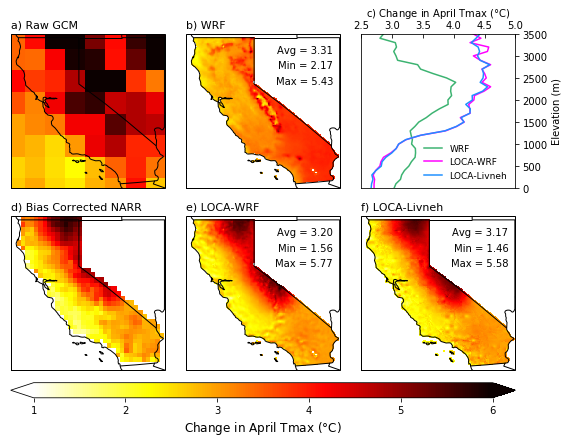

In [60]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# Same grid CA mask
mask_nc = netCDF4.Dataset(inv_dir+'same_grid_CA_mask.nc')
ca_mask = mask_nc.variables['landmask'][:,:]
mask_nc.close()

# Regridded WRF d02 topography
inv_nc = netCDF4.Dataset(inv_dir+'invariant_d02_same_grid.nc')
hgt = inv_nc.variables['HGT'][0,:,:]
inv_nc.close()

# Raw GCM (CNRM-CM5)
gcm_change_nc = xr.open_dataset('/Users/nberg/projects/doe/scratch/cnrm_cm5_diff_tmax_april.nc')
gcm_change_tmax = gcm_change_nc['AIR2M'][:,:]
gcm_lon = gcm_change_nc['LON']
gcm_lat = gcm_change_nc['LAT']

# WRF 
wrf_fut_nc = netCDF4.Dataset(data_dir+'wrf_fut_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
wrf_hist_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
wrf_fut_tmax = wrf_fut_nc.variables['tmax'][:,:]
same_lat = wrf_fut_nc.variables['lat'][:]
same_lon = wrf_fut_nc.variables['lon'][:]
wrf_hist_tmax = wrf_hist_nc.variables['tmax'][:,:]
wrf_change_tmax = wrf_fut_tmax - wrf_hist_tmax
wrf_fut_nc.close()
wrf_hist_nc.close()

# NARR (BC) 
narr_fut_nc = netCDF4.Dataset(data_dir+'narr_forcing_livneh_fut_1991-2000_tmax_april_CA_mask.nc', 'r')
narr_hist_nc = netCDF4.Dataset(data_dir+'livneh_narr_grid_hist_1991-2000_tmax_april_CA_mask.nc', 'r')
narr_fut_tmax = narr_fut_nc.variables['tmax'][:,:]
narr_lat = narr_fut_nc.variables['lat'][:]
narr_lon = narr_fut_nc.variables['lon'][:]
narr_hist_tmax = narr_hist_nc.variables['tmax'][:,:]
narr_change_tmax = narr_fut_tmax - narr_hist_tmax
narr_fut_nc.close()
narr_hist_nc.close()

# WRF-LOCA
loca_wrf_fut_nc = netCDF4.Dataset(data_dir+'loca_wrf_fut_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_wrf_hist_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_wrf_fut_tmax = loca_wrf_fut_nc.variables['tmax'][:,:]
loca_wrf_hist_tmax = loca_wrf_hist_nc.variables['tmax'][:,:]
loca_wrf_change_tmax = loca_wrf_fut_tmax - loca_wrf_hist_tmax
loca_wrf_fut_nc.close()
loca_wrf_hist_nc.close()

# LOCA-Livneh
loca_livneh_fut_nc = netCDF4.Dataset(data_dir+'loca_livneh_fut_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_livneh_hist_nc = netCDF4.Dataset(data_dir+'loca_livneh_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_livneh_fut_tmax = loca_livneh_fut_nc.variables['tmax'][:,:]
loca_livneh_hist_tmax = loca_livneh_hist_nc.variables['tmax'][:,:]
loca_livneh_change_tmax = loca_livneh_fut_tmax - loca_livneh_hist_tmax
loca_livneh_fut_nc.close()
loca_livneh_hist_nc.close()

# DataFrame of HGT, ca_mask, WRF, LOCA-WRF, and LOCA-Livneh
# for binning tmax changes by elevation band
df = pd.DataFrame()
df['HGT'] = hgt.flatten()
df['MASK'] = ca_mask.flatten()
df['WRF'] = wrf_change_tmax.flatten()
df['LOCA-WRF'] = loca_wrf_change_tmax.flatten()
df['LOCA-Livneh'] = loca_livneh_change_tmax.flatten()

# Retain only CA grid cells and non-NaNs
df = df[(df['MASK'] == 1) & (df['WRF'] > 0) & (df['LOCA-WRF'] > 0) & (df['LOCA-Livneh'] > 0)]

# Compute avg warming in 100m elevation intervals
wrf_list = []
loca_wrf_list = []
loca_livneh_list = []
for h in range(0,3600,100):
    temp_df = df[(df['HGT'] >= h) & (df['HGT'] < h + 100)].mean()
    wrf_list.append(temp_df['WRF'])
    loca_wrf_list.append(temp_df['LOCA-WRF'])
    loca_livneh_list.append(temp_df['LOCA-Livneh'])

# AVG, MIN, and MAX statistics
wrf_change_tmax_real = wrf_change_tmax[wrf_change_tmax > -100] # quick way to filter out nans
wrf_change_tmax_avg, wrf_change_tmax_min, wrf_change_tmax_max = np.mean(wrf_change_tmax_real),\
                                    np.min(wrf_change_tmax_real), np.max(wrf_change_tmax_real)
    
loca_wrf_change_tmax_real = loca_wrf_change_tmax[loca_wrf_change_tmax > -100] # quick way to filter out nans
loca_wrf_change_tmax_avg, loca_wrf_change_tmax_min, loca_wrf_change_tmax_max = np.mean(loca_wrf_change_tmax_real), \
                    np.min(loca_wrf_change_tmax_real), np.max(loca_wrf_change_tmax_real)

loca_livneh_change_tmax_real = loca_livneh_change_tmax[loca_livneh_change_tmax > -100] # quick way to filter out nans
loca_livneh_change_tmax_avg, loca_livneh_change_tmax_min, loca_livneh_change_tmax_max = np.mean(loca_livneh_change_tmax_real), \
                    np.min(loca_livneh_change_tmax_real), np.max(loca_livneh_change_tmax_real)
    
# Figure ---
plot_ticks = np.linspace(1,6,11)

fig = plt.figure(figsize=(8,6))

# Raw GCM
ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) Raw GCM', loc='left', fontsize=11)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
plot1 = ax1.pcolormesh(gcm_lon, gcm_lat, gcm_change_tmax, transform=ccrs.PlateCarree(), 
                       cmap='hot_r', vmin=1, vmax=6)
# Obtain the x and y limits to create a sqaure plot
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()
ax1.set_aspect(abs(x1-x0)/abs(y1-y0))

# WRF
ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('b) WRF', loc='left', fontsize=11)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
ax2.text(-114.5, 41, 'Avg = {0:.2f}'.format(wrf_change_tmax_avg),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax2.text(-114.5, 40, 'Min = {0:.2f}'.format(wrf_change_tmax_min),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax2.text(-114.5, 39, 'Max = {0:.2f}'.format(wrf_change_tmax_max),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
plot2 = ax2.pcolormesh(same_lon, same_lat, wrf_change_tmax, 
                     transform=ccrs.PlateCarree(), vmin=1, vmax=6, cmap='hot_r')
ax2.set_aspect(abs(x1-x0)/abs(y1-y0))

# Temperature change vs. elevation 
elev_ticks = [tick for tick in range(0,3600,100)]
ax3 = fig.add_subplot(2, 3, 3, adjustable='box')
plot3 = ax3.plot(wrf_list, elev_ticks, color='mediumseagreen', label='WRF')
plot3 = ax3.plot(loca_wrf_list, elev_ticks, color='magenta', label='LOCA-WRF')
plot3 = ax3.plot(loca_livneh_list, elev_ticks, color='dodgerblue', label='LOCA-Livneh')
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.tick_params(axis='x', direction='in')
ax3.legend(loc='lower right', frameon=False, fontsize=9)
ax3.set_ylabel('Elevation (m)')
ax3.set_xlabel('c) Change in April Tmax ($\degree$C)')
ax3.set_ylim(0,3500)
ax3.set_xlim(2.5,5)
xx0,xx1 = ax3.get_xlim()
yy0,yy1 = ax3.get_ylim()
ax3.set_aspect(abs(xx1-xx0)/abs(yy1-yy0))


# NARR (Bias Corrected)
ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('d) Bias Corrected NARR', loc='left', fontsize=11)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(cfeature.BORDERS)
ax4.set_extent([235.25,246,32.25,42.25])
plot4 = ax4.pcolormesh(narr_lon, narr_lat, narr_change_tmax, transform=ccrs.PlateCarree(), 
                       cmap='hot_r', vmin=1, vmax=6)
ax4.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-WRF
ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('e) LOCA-WRF', loc='left', fontsize=11)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(cfeature.BORDERS)
ax5.set_extent([235.25,246,32.25,42.25])
ax5.text(-114.5, 41, 'Avg = {0:.2f}'.format(loca_wrf_change_tmax_avg),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax5.text(-114.5, 40, 'Min = {0:.2f}'.format(loca_wrf_change_tmax_min),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax5.text(-114.5, 39, 'Max = {0:.2f}'.format(loca_wrf_change_tmax_max),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
plot5 = ax5.pcolormesh(same_lon, same_lat, loca_wrf_change_tmax,
                     transform=ccrs.PlateCarree(), vmin=1, vmax=6, cmap='hot_r')
ax5.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-Livneh
ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('f) LOCA-Livneh', loc='left', fontsize=11)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(cfeature.BORDERS)
ax6.set_extent([235.25,246,32.25,42.25])
ax6.text(-114.5, 41, 'Avg = {0:.2f}'.format(loca_livneh_change_tmax_avg),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax6.text(-114.5, 40, 'Min = {0:.2f}'.format(loca_livneh_change_tmax_min),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax6.text(-114.5, 39, 'Max = {0:.2f}'.format(loca_livneh_change_tmax_max),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
plot6 = ax6.pcolormesh(same_lon, same_lat, loca_livneh_change_tmax, 
                     transform=ccrs.PlateCarree(), vmin=1, vmax=6, cmap='hot_r')
ax6.set_aspect(abs(x1-x0)/abs(y1-y0))

fig.tight_layout(h_pad=-3)

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Colorbar for all panels
cbar_height = 0.035
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar = plt.colorbar(plot2, cax=cbar_ax, orientation='horizontal', extend='both') # drawedges=True, extend='both')
# cbar.dividers.set_edgecolor('black')
# cbar.dividers.set_linewidth(1)
cbar.set_label('Change in April Tmax ($\degree$C)', fontsize=12)

plt.savefig('/Users/nberg/projects/doe/figures/Figure3.jpeg', dpi=300, bbox_inches='tight')

## Figure 4 

5-panel plot of changes in annual PR (Raw GCM, WRF, NARR(bc), LOCA-WRF, and LOCA-Livneh.

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:1046: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/pytho

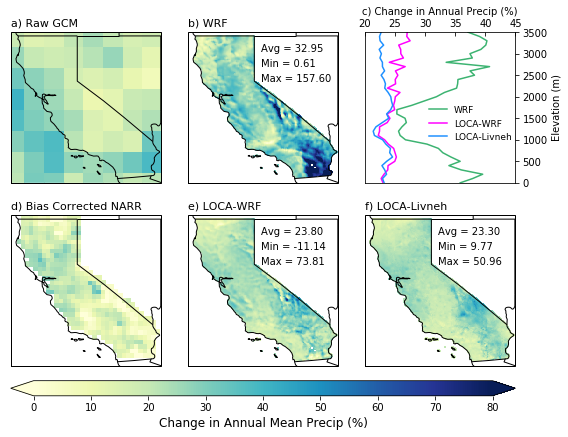

In [62]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# Same grid CA mask
mask_nc = netCDF4.Dataset(inv_dir+'same_grid_CA_mask.nc')
ca_mask = mask_nc.variables['landmask'][:,:]
mask_nc.close()

# Regridded WRF d02 topography
inv_nc = netCDF4.Dataset(inv_dir+'invariant_d02_same_grid.nc')
hgt = inv_nc.variables['HGT'][0,:,:]
inv_nc.close()

# Raw GCM (CNRM-CM5) placeholder
gcm_fut_nc = xr.open_dataset(data_dir+'cnrm_cm5_fut_2081-2100_annual_pr.nc')
gcm_hist_nc = xr.open_dataset(data_dir+'cnrm_cm5_hist_1981-2000_annual_pr.nc')
gcm_fut_pr = gcm_fut_nc.variables['PRECIP'][:,:]
gcm_hist_pr = gcm_hist_nc.variables['PRECIP'][:,:]
gcm_lon = gcm_fut_nc['LON']
gcm_lat = gcm_fut_nc['LAT']
gcm_change_pr = (((gcm_fut_pr - gcm_hist_pr) / gcm_hist_pr) * 100.)

# WRF 
wrf_fut_nc = netCDF4.Dataset(data_dir+'wrf_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
wrf_hist_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
wrf_fut_pr = wrf_fut_nc.variables['pr'][:,:]
same_lat = wrf_fut_nc.variables['lat'][:]
same_lon = wrf_fut_nc.variables['lon'][:]
wrf_hist_pr = wrf_hist_nc.variables['pr'][:,:]
wrf_change_pr = ((wrf_fut_pr - wrf_hist_pr) / wrf_hist_pr) * 100.
wrf_fut_nc.close()
wrf_hist_nc.close()

# NARR (BC) 
narr_fut_nc = netCDF4.Dataset(data_dir+'narr_forcing_livneh_fut_1991-2000_annual_pr_CA_mask.nc', 'r')
narr_hist_nc = netCDF4.Dataset(data_dir+'livneh_narr_grid_hist_1991-2000_annual_pr_CA_mask.nc', 'r')
narr_fut_pr = narr_fut_nc.variables['pr'][:,:]
narr_lat = narr_fut_nc.variables['lat'][:]
narr_lon = narr_fut_nc.variables['lon'][:]
narr_hist_pr = narr_hist_nc.variables['pr'][:,:]
narr_change_pr = ((narr_fut_pr - narr_hist_pr) / narr_hist_pr) * 100.
narr_fut_nc.close()
narr_hist_nc.close()

# WRF-LOCA
loca_wrf_fut_nc = netCDF4.Dataset(data_dir+'loca_wrf_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_wrf_hist_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_wrf_fut_pr = loca_wrf_fut_nc.variables['pr'][:,:]
loca_wrf_hist_pr = loca_wrf_hist_nc.variables['pr'][:,:]
loca_wrf_change_pr = ((loca_wrf_fut_pr - loca_wrf_hist_pr) / loca_wrf_hist_pr) * 100.
loca_wrf_fut_nc.close()
loca_wrf_hist_nc.close()

# LOCA-Livneh
loca_livneh_fut_nc = netCDF4.Dataset(data_dir+'loca_livneh_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_livneh_hist_nc = netCDF4.Dataset(data_dir+'loca_livneh_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_livneh_fut_pr = loca_livneh_fut_nc.variables['pr'][:,:]
loca_livneh_hist_pr = loca_livneh_hist_nc.variables['pr'][:,:]
loca_livneh_change_pr = ((loca_livneh_fut_pr - loca_livneh_hist_pr) / loca_livneh_hist_pr) * 100.
loca_livneh_fut_nc.close()
loca_livneh_hist_nc.close()

# DataFrame of HGT, ca_mask, WRF, LOCA-WRF, and LOCA-Livneh
# for binning tmax changes by elevation band
df = pd.DataFrame()
df['HGT'] = hgt.flatten()
df['MASK'] = ca_mask.flatten()
df['WRF'] = wrf_change_pr.flatten()
df['LOCA-WRF'] = loca_wrf_change_pr.flatten()
df['LOCA-Livneh'] = loca_livneh_change_pr.flatten()

# Retain only CA grid cells and non-NaNs
df = df[(df['MASK'] == 1) & (df['WRF'] > 0) & (df['LOCA-WRF'] > 0) & (df['LOCA-Livneh'] > 0)]

# Compute avg pr change in 100m elevation intervals
wrf_list = []
loca_wrf_list = []
loca_livneh_list = []
for h in range(0,3600,100):
    temp_df = df[(df['HGT'] >= h) & (df['HGT'] < h + 100)].mean()
    wrf_list.append(temp_df['WRF'])
    loca_wrf_list.append(temp_df['LOCA-WRF'])
    loca_livneh_list.append(temp_df['LOCA-Livneh'])
    
# AVG, MIN, and MAX statistics
wrf_change_pr_real = wrf_change_pr[wrf_change_pr > -1000] # quick way to filter out nans
wrf_change_pr_avg, wrf_change_pr_min, wrf_change_pr_max = np.mean(wrf_change_pr_real),\
                                    np.min(wrf_change_pr_real), np.max(wrf_change_pr_real)
    
loca_wrf_change_pr_real = loca_wrf_change_pr[loca_wrf_change_pr > -100] # quick way to filter out nans
loca_wrf_change_pr_avg, loca_wrf_change_pr_min, loca_wrf_change_pr_max = np.mean(loca_wrf_change_pr_real), \
                    np.min(loca_wrf_change_pr_real), np.max(loca_wrf_change_pr_real)

loca_livneh_change_pr_real = loca_livneh_change_pr[loca_livneh_change_pr > -1000] # quick way to filter out nans
loca_livneh_change_pr_avg, loca_livneh_change_pr_min, loca_livneh_change_pr_max = np.mean(loca_livneh_change_pr_real), \
                    np.min(loca_livneh_change_pr_real), np.max(loca_livneh_change_pr_real)    

    
# Spatial correlation between WRF and LOCA-WRF for grid cells 1000-2000m
# df_1000 = df[(df['HGT'] >= 1000) & (df['HGT'] <= 2000.)]
# r_val, p_val = stats.pearsonr(df_1000['WRF'], df_1000['LOCA-WRF'])
# print('r = {0:.2f} p = {1:.2f}'.format(r_val, p_val))
    
# Figure ---
plot_ticks = np.linspace(0,80,9)

fig = plt.figure(figsize=(8,6))

# Raw GCM
ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) Raw GCM', loc='left', fontsize=11)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
plot1 = ax1.pcolormesh(gcm_lon, gcm_lat, gcm_change_pr, transform=ccrs.PlateCarree(), 
                       cmap='YlGnBu', vmin=0, vmax=80)
# Obtain the x and y limits to create a sqaure plot
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()
ax1.set_aspect(abs(x1-x0)/abs(y1-y0))


# WRF
ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('b) WRF', loc='left', fontsize=11)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
ax2.text(-119.5, 41, 'Avg = {0:.2f}'.format(wrf_change_pr_avg),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax2.text(-119.5, 40, 'Min = {0:.2f}'.format(wrf_change_pr_min),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax2.text(-119.5, 39, 'Max = {0:.2f}'.format(wrf_change_pr_max),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
plot2 = ax2.pcolormesh(same_lon, same_lat, wrf_change_pr,
                     transform=ccrs.PlateCarree(), 
                        vmin=0, vmax=80, cmap='YlGnBu')
ax2.set_aspect(abs(x1-x0)/abs(y1-y0))
    
# Precip change vs. elevation 
elev_ticks = [tick for tick in range(0,3600,100)]
ax3 = fig.add_subplot(2, 3, 3, adjustable='box')
plot3 = ax3.plot(wrf_list, elev_ticks, color='mediumseagreen', label='WRF')
plot3 = ax3.plot(loca_wrf_list, elev_ticks, color='magenta', label='LOCA-WRF')
plot3 = ax3.plot(loca_livneh_list, elev_ticks, color='dodgerblue', label='LOCA-Livneh')
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.tick_params(axis='x', direction='in')
ax3.legend(loc=(.4, .25), frameon=False, fontsize=9)
ax3.set_ylabel('Elevation (m)')
ax3.set_xlabel('c) Change in Annual Precip (%)')
ax3.set_ylim(0,3500)
ax3.set_xlim(20,45)
xx0,xx1 = ax3.get_xlim()
yy0,yy1 = ax3.get_ylim()
ax3.set_aspect(abs(xx1-xx0)/abs(yy1-yy0))

# NARR (BC)
ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('d) Bias Corrected NARR', loc='left', fontsize=11)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(cfeature.BORDERS)
ax4.set_extent([235.25,246,32.25,42.25])
plot4 = ax4.pcolormesh(narr_lon, narr_lat, narr_change_pr, transform=ccrs.PlateCarree(), 
                       cmap='YlGnBu', vmin=0, vmax=80)
ax4.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-WRF
ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('e) LOCA-WRF', loc='left', fontsize=11)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(cfeature.BORDERS)
ax5.set_extent([235.25,246,32.25,42.25])
ax5.text(-119.5, 41, 'Avg = {0:.2f}'.format(loca_wrf_change_pr_avg),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax5.text(-119.5, 40, 'Min = {0:.2f}'.format(loca_wrf_change_pr_min),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax5.text(-119.5, 39, 'Max = {0:.2f}'.format(loca_wrf_change_pr_max),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
plot5 = ax5.pcolormesh(same_lon, same_lat, loca_wrf_change_pr, 
                     transform=ccrs.PlateCarree(), 
                       vmin=0, vmax=80, cmap='YlGnBu')
ax5.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-Livneh
ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('f) LOCA-Livneh', loc='left', fontsize=11)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(cfeature.BORDERS)
ax6.set_extent([235.25,246,32.25,42.25])
ax6.text(-119.5, 41, 'Avg = {0:.2f}'.format(loca_livneh_change_pr_avg),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax6.text(-119.5, 40, 'Min = {0:.2f}'.format(loca_livneh_change_pr_min),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax6.text(-119.5, 39, 'Max = {0:.2f}'.format(loca_livneh_change_pr_max),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
plot6 = ax6.pcolormesh(same_lon, same_lat, loca_livneh_change_pr, 
                     transform=ccrs.PlateCarree(), 
                       vmin=0, vmax=80, cmap='YlGnBu')
ax6.set_aspect(abs(x1-x0)/abs(y1-y0))

fig.tight_layout(h_pad=-3)

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Colorbar for all panels
cbar_height = 0.035
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar = plt.colorbar(plot2, cax=cbar_ax, orientation='horizontal', extend='both')
# cbar.dividers.set_edgecolor('black')
# cbar.dividers.set_linewidth(1)
cbar.set_label('Change in Annual Mean Precip (%)', fontsize=12)

plt.savefig('/Users/nberg/projects/doe/figures/Figure4.jpeg', dpi=300, bbox_inches='tight')

## Supplemental Figure 

4-panel plot comparing LOCA-WRF and WRF historical/future projections for April Tmax and Annual PR.

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/s

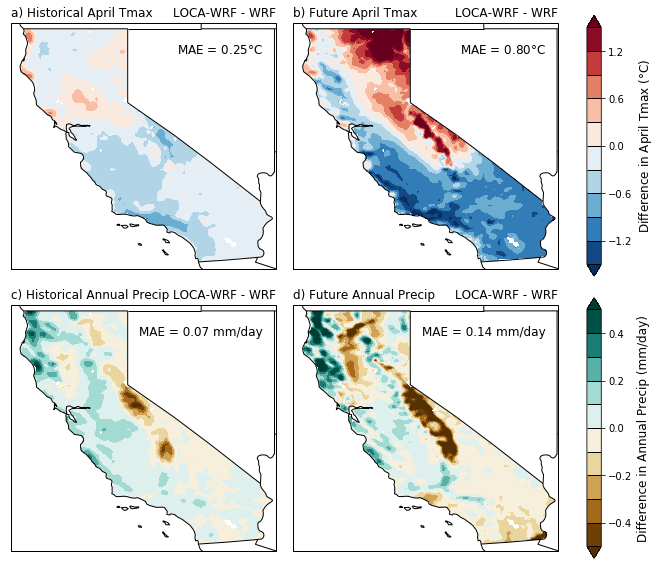

In [17]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# WRF - historical April Tmax and Annual PR
hist_wrf_tmax_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
hist_wrf_tmax = hist_wrf_tmax_nc.variables['tmax'][:,:]
same_lat = hist_wrf_tmax_nc.variables['lat'][:]
same_lon = hist_wrf_tmax_nc.variables['lon'][:]
hist_wrf_tmax_nc.close()

hist_wrf_pr_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
hist_wrf_pr = hist_wrf_pr_nc.variables['pr'][:,:]
hist_wrf_pr_nc.close()

# LOCA-WRF historical April Tmax and Annual PR
hist_loca_wrf_tmax_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
hist_loca_wrf_tmax = hist_loca_wrf_tmax_nc.variables['tmax'][:,:]
hist_loca_wrf_tmax_nc.close()

hist_loca_wrf_pr_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
hist_loca_wrf_pr = hist_loca_wrf_pr_nc.variables['pr'][:,:]
hist_loca_wrf_pr_nc.close()

# WRF - future April Tmax and Annual PR
fut_wrf_tmax_nc = netCDF4.Dataset(data_dir+'wrf_fut_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
fut_wrf_tmax = fut_wrf_tmax_nc.variables['tmax'][:,:]
fut_wrf_tmax_nc.close()

fut_wrf_pr_nc = netCDF4.Dataset(data_dir+'wrf_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
fut_wrf_pr = fut_wrf_pr_nc.variables['pr'][:,:]
fut_wrf_pr_nc.close()

# LOCA-WRF - future April Tmax and Annual PR
fut_loca_wrf_tmax_nc = netCDF4.Dataset(data_dir+'loca_wrf_fut_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
fut_loca_wrf_tmax = fut_loca_wrf_tmax_nc.variables['tmax'][:,:]
fut_loca_wrf_tmax_nc.close()

fut_loca_wrf_pr_nc = netCDF4.Dataset(data_dir+'loca_wrf_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
fut_loca_wrf_pr = fut_loca_wrf_pr_nc.variables['pr'][:,:]
fut_loca_wrf_pr_nc.close()

# Compute dataset to dataset differences
hist_diff_tmax = hist_loca_wrf_tmax - hist_wrf_tmax
hist_diff_pr = hist_loca_wrf_pr - hist_wrf_pr
fut_diff_tmax = fut_loca_wrf_tmax - fut_wrf_tmax
fut_diff_pr = fut_loca_wrf_pr - fut_wrf_pr

# Statistics (mean absolute error)
hist_diff_tmax_real = hist_diff_tmax[hist_diff_tmax > -1000] # quick way to filter out nans
hist_diff_pr_real = hist_diff_pr[hist_diff_pr > -1000]
fut_diff_tmax_real = fut_diff_tmax[hist_diff_tmax > -1000]
fut_diff_pr_real = fut_diff_pr[hist_diff_pr > -1000]

mae_hist_diff_tmax_real = np.mean(np.abs(hist_diff_tmax_real))
mae_hist_diff_pr_real = np.mean(np.abs(hist_diff_pr_real))
mae_fut_diff_tmax_real = np.mean(np.abs(fut_diff_tmax_real))
mae_fut_diff_pr_real = np.mean(np.abs(fut_diff_pr_real))
 
# 4-panel plot
tmax_ticks = np.linspace(-1.5,1.5,11)
pr_ticks = np.linspace(-.5,.5,11)

fig = plt.figure(figsize=(8,8))

# LOCA-WRF - WRF historical April Tmax
ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) Historical April Tmax', loc='left', fontsize=12)
ax1.set_title('LOCA-WRF - WRF', loc='right', fontsize=12)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
ax1.text(-114.5, 41, 'MAE = {0:.2f}$\degree$C'.format(mae_hist_diff_tmax_real),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=12)
plot1 = ax1.contourf(same_lon, same_lat, hist_diff_tmax, tmax_ticks, 
                     transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both')

# LOCA-WRF - WRF future April Tmax
ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('b) Future April Tmax', loc='left', fontsize=12)
ax2.set_title('LOCA-WRF - WRF', loc='right', fontsize=12)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
ax2.text(-114.5, 41, 'MAE = {0:.2f}$\degree$C'.format(mae_fut_diff_tmax_real),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=12)
plot2 = ax2.contourf(same_lon, same_lat, fut_diff_tmax, tmax_ticks, 
                     transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both')

# LOCA-WRF - WRF historical Annual Pr
ax3 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('c) Historical Annual Precip', loc='left', fontsize=12)
ax3.set_title('LOCA-WRF - WRF', loc='right', fontsize=12)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(cfeature.BORDERS)
ax3.set_extent([235.25,246,32.25,42.25])
ax3.text(-114.5, 41, 'MAE = {0:.2f} mm/day'.format(mae_hist_diff_pr_real),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=12)
plot3 = ax3.contourf(same_lon, same_lat, hist_diff_pr, pr_ticks, 
                     transform=ccrs.PlateCarree(), cmap='BrBG', extend='both')

# LOCA-WRF - WRF future Annual PR
ax4 = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('d) Future Annual Precip', loc='left', fontsize=12)
ax4.set_title('LOCA-WRF - WRF', loc='right', fontsize=12)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(cfeature.BORDERS)
ax4.set_extent([235.25,246,32.25,42.25])
ax4.text(-114.5, 41, 'MAE = {0:.2f} mm/day'.format(mae_fut_diff_pr_real),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=12)
plot4 = ax4.contourf(same_lon, same_lat, fut_diff_pr, pr_ticks, 
                     transform=ccrs.PlateCarree(), cmap='BrBG', extend='both')

fig.tight_layout()

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()

cbar_ax12 = fig.add_axes([ax2_pos.x1+0.05, ax1_pos.y0, 0.025, ax2_pos.y1 - ax2_pos.y0])
cbar12 = plt.colorbar(plot1, cax=cbar_ax12, orientation='vertical', drawedges=True, extend='both')
cbar12.dividers.set_edgecolor('black')
cbar12.dividers.set_linewidth(1)
#cbar12.set_label('Difference in April Tmax '+'('+r'$\degree$'+'C)', fontsize=12)
cbar12.set_label('Difference in April Tmax ($\degree$C)', fontsize=12)

cbar_ax34 = fig.add_axes([ax4_pos.x1+0.05, ax4_pos.y0, 0.025, ax4_pos.y1 - ax4_pos.y0])
cbar34 = plt.colorbar(plot3, cax=cbar_ax34, orientation='vertical', drawedges=True, extend='both')
cbar34.dividers.set_edgecolor('black')
cbar34.dividers.set_linewidth(1)
cbar34.set_label('Difference in Annual Precip (mm/day)', fontsize=12)

#plt.savefig('/Users/nberg/projects/doe/figures/Figure4.jpeg', dpi=300, bbox_inches='tight')

## Supplemental Figure: Freezing line elevation

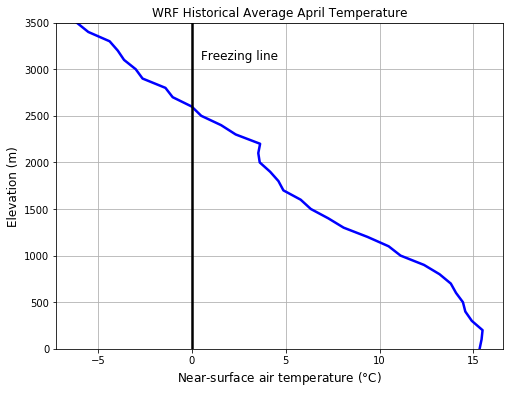

In [14]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# Same grid CA mask
mask_nc = netCDF4.Dataset(inv_dir+'same_grid_CA_mask.nc')
ca_mask = mask_nc.variables['landmask'][:,:]
mask_nc.close()

# Regridded WRF d02 topography
inv_nc = netCDF4.Dataset(inv_dir+'invariant_d02_same_grid.nc')
hgt = inv_nc.variables['HGT'][0,:,:]
inv_nc.close()

# WRF 
wrf_hist_nc = netCDF4.Dataset(data_dir+'wrfpost_d02_1991-2000_04_T2_same_grid.nc', 'r')
same_lat = wrf_hist_nc.variables['lat'][:]
same_lon = wrf_hist_nc.variables['lon'][:]
wrf_hist_t2 = wrf_hist_nc.variables['T2'][:,:] -273.15
wrf_hist_nc.close()

# DataFrame of HGT, ca_mask, WRF, LOCA-WRF, and LOCA-Livneh
# for binning tmax changes by elevation band
df = pd.DataFrame()
df['HGT'] = hgt.flatten()
df['MASK'] = ca_mask.flatten()
df['T2'] = wrf_hist_t2.flatten()

# Retain only CA grid cells and non-NaNs
# df = df[(df['MASK'] == 1) & (df['WRF'] > 0)]
df = df[(df['MASK'] == 1) & (df['T2'] > -100)]

# Compute avg warming in 100m elevation intervals
wrf_list = []
for h in range(0,3600,100):
    temp_df = df[(df['HGT'] >= h) & (df['HGT'] < h + 100)].mean()
    wrf_list.append(temp_df['T2'])

    
# # Temperature change vs. elevation 
fig = plt.figure(figsize=(8,6))
elev_ticks = [tick for tick in range(0,3600,100)]
ax = fig.add_subplot(1, 1, 1, adjustable='box')
plot = ax.plot(wrf_list, elev_ticks, color='blue', linewidth=2.5, label='WRF')
plt.axvline(x=0, color='black', linewidth=2.5)
plt.grid(True)
ax.text(0.5, 3100, 'Freezing line', fontsize=12)
ax.set_ylabel('Elevation (m)', fontsize=12)
ax.set_xlabel('Near-surface air temperature ($\degree$C)', fontsize=12)
ax.set_title('WRF Historical Average April Temperature')
ax.set_ylim(0, 3500)
#plt.savefig('/Users/nberg/projects/doe/figures/FigureS2.jpeg', dpi=300, bbox_inches='tight')

### Supplemental Figure Changes in SWDOWN during March, April, May

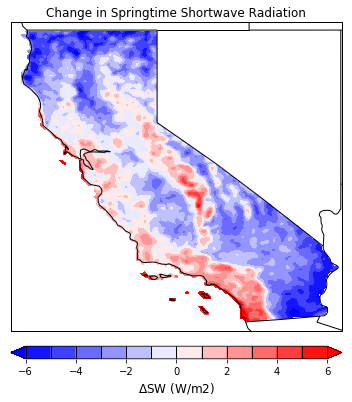

In [35]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# # Same grid CA mask
mask_nc = netCDF4.Dataset(inv_dir+'same_grid_CA_mask.nc')
ca_mask = mask_nc.variables['landmask'][:,:]
mask_nc.close()

# Regridded WRF d02 SWDOWN (same resolution as LOCA-WRF and LOCA-Livneh)
wrf_nc = netCDF4.Dataset(data_dir+'wrfpost_d02_change_MAM_SWDOWN_same_grid.nc')
wrf_sw = wrf_nc.variables['SWDOWN'][0,:,:]
wrf_lat = wrf_nc.variables['lat'][:]
wrf_lon = wrf_nc.variables['lon'][:]
wrf_nc.close()

# Retain only CA grid cells
wrf_sw_ca = np.ma.masked_where(ca_mask == 0, wrf_sw)

# Map
plot_ticks = np.linspace(-6,6,13)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines('50m')
ax.set_title('Change in Springtime Shortwave Radiation', fontsize=12)
ax.add_feature(states_provinces, edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.set_extent([235.25,246,32.25,42.25])
plot = ax.contourf(wrf_lon, wrf_lat, wrf_sw_ca, plot_ticks, 
                     transform=ccrs.PlateCarree(), cmap='bwr', extend='both')

fig.tight_layout()

# Obtain axes coordinates for each subplot for colorbar positioning
ax_pos = ax.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width

# Colorbar for all panels
cbar_height = 0.035
cbar_ax = fig.add_axes([ax_pos.x0, ax_pos.y0-0.05, ax_pos.x1-ax_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar = plt.colorbar(plot, cax=cbar_ax, orientation='horizontal', drawedges=True, extend='both')
cbar.dividers.set_edgecolor('black')
cbar.dividers.set_linewidth(1)
cbar.set_label('$\Delta$SW (W/m2)', fontsize=12)
plt.savefig('/Users/nberg/projects/doe/figures/FigureS3.jpeg', dpi=300, bbox_inches='tight')
                        

## Figure SX: Historical April Tmax

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


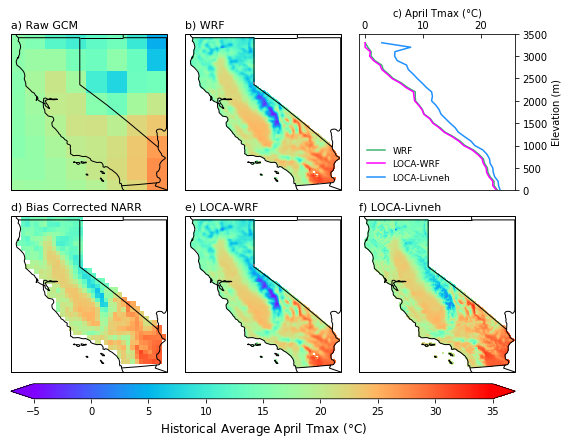

In [21]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# Same grid CA mask
mask_nc = netCDF4.Dataset(inv_dir+'same_grid_CA_mask.nc')
ca_mask = mask_nc.variables['landmask'][:,:]
mask_nc.close()

# Regridded WRF d02 topography
inv_nc = netCDF4.Dataset(inv_dir+'invariant_d02_same_grid.nc')
hgt = inv_nc.variables['HGT'][0,:,:]
inv_nc.close()

# Raw GCM (CNRM-CM5)
gcm_hist_nc = xr.open_dataset(data_dir+'cnrm_cm5_hist_1981-2000_tmax_april.nc')
gcm_hist_tmax = gcm_hist_nc['tmax'][:,:] - 273.15 #K to C
gcm_lon = gcm_hist_nc['lon']
gcm_lat = gcm_hist_nc['lat']

# WRF 
wrf_hist_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
same_lat = wrf_hist_nc.variables['lat'][:]
same_lon = wrf_hist_nc.variables['lon'][:]
wrf_hist_tmax = wrf_hist_nc.variables['tmax'][:,:]
wrf_hist_nc.close()

# NARR (BC) 
narr_hist_nc = netCDF4.Dataset(data_dir+'livneh_narr_grid_hist_1991-2000_tmax_april_CA_mask.nc', 'r')
narr_hist_tmax = narr_hist_nc.variables['tmax'][:,:]
narr_lat = narr_hist_nc.variables['lat'][:]
narr_lon = narr_hist_nc.variables['lon'][:]
narr_hist_nc.close()

# WRF-LOCA
loca_wrf_hist_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_wrf_hist_tmax = loca_wrf_hist_nc.variables['tmax'][:,:]
loca_wrf_hist_nc.close()

# LOCA-Livneh
loca_livneh_hist_nc = netCDF4.Dataset(data_dir+'loca_livneh_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_livneh_hist_tmax = loca_livneh_hist_nc.variables['tmax'][:,:]
loca_livneh_hist_nc.close()

# DataFrame of HGT, ca_mask, WRF, LOCA-WRF, and LOCA-Livneh
# for binning tmax changes by elevation band
df = pd.DataFrame()
df['HGT'] = hgt.flatten()
df['MASK'] = ca_mask.flatten()
df['WRF'] = wrf_hist_tmax.flatten()
df['LOCA-WRF'] = loca_wrf_hist_tmax.flatten()
df['LOCA-Livneh'] = loca_livneh_hist_tmax.flatten()

# Retain only CA grid cells and non-NaNs
df = df[(df['MASK'] == 1) & (df['WRF'] > 0) & (df['LOCA-WRF'] > 0) & (df['LOCA-Livneh'] > 0)]

# Compute avg warming in 100m elevation intervals
wrf_list = []
loca_wrf_list = []
loca_livneh_list = []
for h in range(0,3600,100):
    temp_df = df[(df['HGT'] >= h) & (df['HGT'] < h + 100)].mean()
    wrf_list.append(temp_df['WRF'])
    loca_wrf_list.append(temp_df['LOCA-WRF'])
    loca_livneh_list.append(temp_df['LOCA-Livneh'])

    # Figure ---
plot_ticks = np.linspace(1,6,11)

fig = plt.figure(figsize=(8,6))

# Raw GCM
ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) Raw GCM', loc='left', fontsize=11)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
plot1 = ax1.pcolormesh(gcm_lon, gcm_lat, gcm_hist_tmax, 
                       transform=ccrs.PlateCarree(), 
                       cmap='rainbow', vmin=-5, vmax=35)
# Obtain the x and y limits to create a sqaure plot
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()
ax1.set_aspect(abs(x1-x0)/abs(y1-y0))

# WRF
ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('b) WRF', loc='left', fontsize=11)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
plot2 = ax2.pcolormesh(same_lon, same_lat, wrf_hist_tmax, 
                     transform=ccrs.PlateCarree(), 
                       vmin=-5, vmax=35, cmap='rainbow')
ax2.set_aspect(abs(x1-x0)/abs(y1-y0))

# Temperature change vs. elevation 
elev_ticks = [tick for tick in range(0,3600,100)]
ax3 = fig.add_subplot(2, 3, 3, adjustable='box')
plot3 = ax3.plot(wrf_list, elev_ticks, color='mediumseagreen', label='WRF')
plot3 = ax3.plot(loca_wrf_list, elev_ticks, color='magenta', label='LOCA-WRF')
plot3 = ax3.plot(loca_livneh_list, elev_ticks, color='dodgerblue', label='LOCA-Livneh')
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.tick_params(axis='x', direction='in')
ax3.legend(loc='lower left', frameon=False, fontsize=9)
ax3.set_ylabel('Elevation (m)')
ax3.set_xlabel('c) April Tmax ($\degree$C)')
ax3.set_ylim(0,3500)
ax3.set_xlim(-1,26)
xx0,xx1 = ax3.get_xlim()
yy0,yy1 = ax3.get_ylim()
ax3.set_aspect(abs(xx1-xx0)/abs(yy1-yy0))


# NARR (Bias Corrected)
ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('d) Bias Corrected NARR', loc='left', fontsize=11)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(cfeature.BORDERS)
ax4.set_extent([235.25,246,32.25,42.25])
plot4 = ax4.pcolormesh(narr_lon, narr_lat, narr_hist_tmax, 
                       transform=ccrs.PlateCarree(), 
                       cmap='rainbow', vmin=-5, vmax=35)
ax4.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-WRF
ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('e) LOCA-WRF', loc='left', fontsize=11)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(cfeature.BORDERS)
ax5.set_extent([235.25,246,32.25,42.25])
plot5 = ax5.pcolormesh(same_lon, same_lat, loca_wrf_hist_tmax,
                     transform=ccrs.PlateCarree(), 
                       vmin=-5, vmax=35, cmap='rainbow')
ax5.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-Livneh
ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('f) LOCA-Livneh', loc='left', fontsize=11)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(cfeature.BORDERS)
ax6.set_extent([235.25,246,32.25,42.25])
plot6 = ax6.pcolormesh(same_lon, same_lat, loca_livneh_hist_tmax, 
                     transform=ccrs.PlateCarree(), 
                       vmin=-5, vmax=35, cmap='rainbow')
ax6.set_aspect(abs(x1-x0)/abs(y1-y0))

fig.tight_layout(h_pad=-3)

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Colorbar for all panels
cbar_height = 0.035
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar = plt.colorbar(plot2, cax=cbar_ax, orientation='horizontal', extend='both') # drawedges=True, extend='both')
# cbar.dividers.set_edgecolor('black')
# cbar.dividers.set_linewidth(1)
cbar.set_label('Historical Average April Tmax ($\degree$C)', fontsize=12)

plt.savefig('/Users/nberg/projects/doe/figures/historical_april_tmax.jpeg', dpi=300, bbox_inches='tight')




## Figure SX: Future Average April Tmax

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


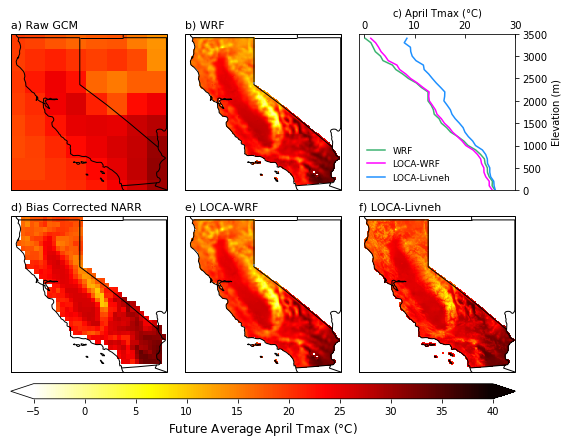

In [19]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# Same grid CA mask
mask_nc = netCDF4.Dataset(inv_dir+'same_grid_CA_mask.nc')
ca_mask = mask_nc.variables['landmask'][:,:]
mask_nc.close()

# Regridded WRF d02 topography
inv_nc = netCDF4.Dataset(inv_dir+'invariant_d02_same_grid.nc')
hgt = inv_nc.variables['HGT'][0,:,:]
inv_nc.close()

# Raw GCM (CNRM-CM5)
gcm_fut_nc = xr.open_dataset(data_dir+'cnrm_cm5_fut_2081-2100_tmax_april.nc')
gcm_fut_tmax = gcm_fut_nc['tmax'][:,:] - 273.15 # K to C
gcm_lon = gcm_fut_nc['lon']
gcm_lat = gcm_fut_nc['lat']

# WRF 
wrf_fut_nc = netCDF4.Dataset(data_dir+'wrf_fut_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
same_lat = wrf_fut_nc.variables['lat'][:]
same_lon = wrf_fut_nc.variables['lon'][:]
wrf_fut_tmax = wrf_fut_nc.variables['tmax'][:,:]
wrf_fut_nc.close()

# NARR (BC) 
narr_fut_nc = netCDF4.Dataset(data_dir+'narr_forcing_livneh_fut_1991-2000_tmax_april_CA_mask.nc', 'r')
narr_fut_tmax = narr_fut_nc.variables['tmax'][:,:]
narr_lat = narr_fut_nc.variables['lat'][:]
narr_lon = narr_fut_nc.variables['lon'][:]
narr_fut_nc.close()

# WRF-LOCA
loca_wrf_fut_nc = netCDF4.Dataset(data_dir+'loca_wrf_fut_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_wrf_fut_tmax = loca_wrf_fut_nc.variables['tmax'][:,:]
loca_wrf_fut_nc.close()

# LOCA-Livneh
loca_livneh_fut_nc = netCDF4.Dataset(data_dir+'loca_livneh_fut_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_livneh_fut_tmax = loca_livneh_fut_nc.variables['tmax'][:,:]
loca_livneh_fut_nc.close()

# DataFrame of HGT, ca_mask, WRF, LOCA-WRF, and LOCA-Livneh
# for binning tmax changes by elevation band
df = pd.DataFrame()
df['HGT'] = hgt.flatten()
df['MASK'] = ca_mask.flatten()
df['WRF'] = wrf_fut_tmax.flatten()
df['LOCA-WRF'] = loca_wrf_fut_tmax.flatten()
df['LOCA-Livneh'] = loca_livneh_fut_tmax.flatten()

# Retain only CA grid cells and non-NaNs
df = df[(df['MASK'] == 1) & (df['WRF'] > 0) & (df['LOCA-WRF'] > 0) & (df['LOCA-Livneh'] > 0)]

# Compute avg warming in 100m elevation intervals
wrf_list = []
loca_wrf_list = []
loca_livneh_list = []
for h in range(0,3600,100):
    temp_df = df[(df['HGT'] >= h) & (df['HGT'] < h + 100)].mean()
    wrf_list.append(temp_df['WRF'])
    loca_wrf_list.append(temp_df['LOCA-WRF'])
    loca_livneh_list.append(temp_df['LOCA-Livneh'])

    # Figure ---
plot_ticks = np.linspace(1,6,11)

fig = plt.figure(figsize=(8,6))

# Raw GCM
ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) Raw GCM', loc='left', fontsize=11)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
plot1 = ax1.pcolormesh(gcm_lon, gcm_lat, gcm_fut_tmax, 
                       transform=ccrs.PlateCarree(), 
                       cmap='rainbow', vmin=-5, vmax=40)
# Obtain the x and y limits to create a sqaure plot
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()
ax1.set_aspect(abs(x1-x0)/abs(y1-y0))

# WRF
ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('b) WRF', loc='left', fontsize=11)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
plot2 = ax2.pcolormesh(same_lon, same_lat, wrf_fut_tmax, 
                     transform=ccrs.PlateCarree(), 
                       vmin=-5, vmax=40, cmap='rainbow')
ax2.set_aspect(abs(x1-x0)/abs(y1-y0))

# Temperature change vs. elevation 
elev_ticks = [tick for tick in range(0,3600,100)]
ax3 = fig.add_subplot(2, 3, 3, adjustable='box')
plot3 = ax3.plot(wrf_list, elev_ticks, color='mediumseagreen', label='WRF')
plot3 = ax3.plot(loca_wrf_list, elev_ticks, color='magenta', label='LOCA-WRF')
plot3 = ax3.plot(loca_livneh_list, elev_ticks, color='dodgerblue', label='LOCA-Livneh')
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.tick_params(axis='x', direction='in')
ax3.legend(loc='lower left', frameon=False, fontsize=9)
ax3.set_ylabel('Elevation (m)')
ax3.set_xlabel('c) April Tmax ($\degree$C)')
ax3.set_ylim(0,3500)
ax3.set_xlim(-1,30)
xx0,xx1 = ax3.get_xlim()
yy0,yy1 = ax3.get_ylim()
ax3.set_aspect(abs(xx1-xx0)/abs(yy1-yy0))


# NARR (Bias Corrected)
ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('d) Bias Corrected NARR', loc='left', fontsize=11)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(cfeature.BORDERS)
ax4.set_extent([235.25,246,32.25,42.25])
plot4 = ax4.pcolormesh(narr_lon, narr_lat, narr_fut_tmax, 
                       transform=ccrs.PlateCarree(), 
                       cmap='rainbow', vmin=-5, vmax=40)
ax4.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-WRF
ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('e) LOCA-WRF', loc='left', fontsize=11)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(cfeature.BORDERS)
ax5.set_extent([235.25,246,32.25,42.25])
plot5 = ax5.pcolormesh(same_lon, same_lat, loca_wrf_fut_tmax,
                     transform=ccrs.PlateCarree(), 
                       vmin=-5, vmax=40, cmap='rainbow')
ax5.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-Livneh
ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('f) LOCA-Livneh', loc='left', fontsize=11)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(cfeature.BORDERS)
ax6.set_extent([235.25,246,32.25,42.25])
plot6 = ax6.pcolormesh(same_lon, same_lat, loca_livneh_fut_tmax, 
                     transform=ccrs.PlateCarree(), 
                       vmin=-5, vmax=40, cmap='raib')
ax6.set_aspect(abs(x1-x0)/abs(y1-y0))

fig.tight_layout(h_pad=-3)

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Colorbar for all panels
cbar_height = 0.035
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar = plt.colorbar(plot2, cax=cbar_ax, orientation='horizontal', extend='both') # drawedges=True, extend='both')
# cbar.dividers.set_edgecolor('black')
# cbar.dividers.set_linewidth(1)
cbar.set_label('Future Average April Tmax ($\degree$C)', fontsize=12)

#plt.savefig('/Users/nberg/projects/doe/figures/future_april_tmax.jpeg', dpi=300, bbox_inches='tight')


# Figure SX: Historical Annual PR

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


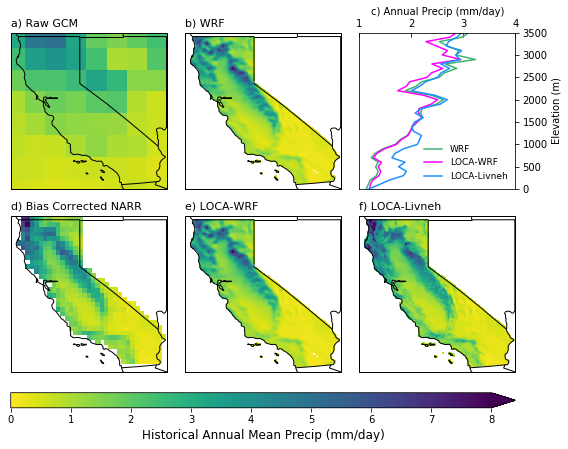

In [12]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# Same grid CA mask
mask_nc = netCDF4.Dataset(inv_dir+'same_grid_CA_mask.nc')
ca_mask = mask_nc.variables['landmask'][:,:]
mask_nc.close()

# Regridded WRF d02 topography
inv_nc = netCDF4.Dataset(inv_dir+'invariant_d02_same_grid.nc')
hgt = inv_nc.variables['HGT'][0,:,:]
inv_nc.close()

# Raw GCM (CNRM-CM5) [convert from mm/s to mm/day]
gcm_hist_nc = xr.open_dataset(data_dir+'cnrm_cm5_hist_1981-2000_annual_pr.nc')
gcm_hist_pr = gcm_hist_nc.variables['PRECIP'][:,:] * 60 * 60 * 24
gcm_lon = gcm_hist_nc['LON']
gcm_lat = gcm_hist_nc['LAT']

# WRF 
wrf_hist_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
same_lat = wrf_hist_nc.variables['lat'][:]
same_lon = wrf_hist_nc.variables['lon'][:]
wrf_hist_pr = wrf_hist_nc.variables['pr'][:,:]
wrf_hist_nc.close()

# NARR (BC) 
narr_hist_nc = netCDF4.Dataset(data_dir+'livneh_narr_grid_hist_1991-2000_annual_pr_CA_mask.nc', 'r')
narr_hist_pr = narr_hist_nc.variables['pr'][:,:]
narr_lat = narr_hist_nc.variables['lat'][:]
narr_lon = narr_hist_nc.variables['lon'][:]
narr_hist_nc.close()

# WRF-LOCA
loca_wrf_hist_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_wrf_hist_pr = loca_wrf_hist_nc.variables['pr'][:,:]
loca_wrf_hist_nc.close()

# LOCA-Livneh
loca_livneh_hist_nc = netCDF4.Dataset(data_dir+'loca_livneh_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_livneh_hist_pr = loca_livneh_hist_nc.variables['pr'][:,:]
loca_livneh_hist_nc.close()

# DataFrame of HGT, ca_mask, WRF, LOCA-WRF, and LOCA-Livneh
# for binning tmax changes by elevation band
df = pd.DataFrame()
df['HGT'] = hgt.flatten()
df['MASK'] = ca_mask.flatten()
df['WRF'] = wrf_hist_pr.flatten()
df['LOCA-WRF'] = loca_wrf_hist_pr.flatten()
df['LOCA-Livneh'] = loca_livneh_hist_pr.flatten()

# Retain only CA grid cells and non-NaNs
df = df[(df['MASK'] == 1) & (df['WRF'] > 0) & (df['LOCA-WRF'] > 0) & (df['LOCA-Livneh'] > 0)]

# Compute avg pr in 100m elevation intervals
wrf_list = []
loca_wrf_list = []
loca_livneh_list = []
for h in range(0,3600,100):
    temp_df = df[(df['HGT'] >= h) & (df['HGT'] < h + 100)].mean()
    wrf_list.append(temp_df['WRF'])
    loca_wrf_list.append(temp_df['LOCA-WRF'])
    loca_livneh_list.append(temp_df['LOCA-Livneh'])
    
# AVG, MIN, and MAX statistics
# wrf_change_pr_real = wrf_change_pr[wrf_change_pr > -1000] # quick way to filter out nans
# wrf_change_pr_avg, wrf_change_pr_min, wrf_change_pr_max = np.mean(wrf_change_pr_real),\
#                                     np.min(wrf_change_pr_real), np.max(wrf_change_pr_real)
    
# loca_wrf_change_pr_real = loca_wrf_change_pr[loca_wrf_change_pr > -100] # quick way to filter out nans
# loca_wrf_change_pr_avg, loca_wrf_change_pr_min, loca_wrf_change_pr_max = np.mean(loca_wrf_change_pr_real), \
#                     np.min(loca_wrf_change_pr_real), np.max(loca_wrf_change_pr_real)

# loca_livneh_change_pr_real = loca_livneh_change_pr[loca_livneh_change_pr > -1000] # quick way to filter out nans
# loca_livneh_change_pr_avg, loca_livneh_change_pr_min, loca_livneh_change_pr_max = np.mean(loca_livneh_change_pr_real), \
#                     np.min(loca_livneh_change_pr_real), np.max(loca_livneh_change_pr_real)    
    
# Figure ---
plot_ticks = np.linspace(0,8,17)

fig = plt.figure(figsize=(8,6))

# Raw GCM
ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) Raw GCM', loc='left', fontsize=11)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
plot1 = ax1.pcolormesh(gcm_lon, gcm_lat, gcm_hist_pr, 
                       transform=ccrs.PlateCarree(), 
                       cmap='viridis_r', vmin=0, vmax=8)
# Obtain the x and y limits to create a sqaure plot
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()
ax1.set_aspect(abs(x1-x0)/abs(y1-y0))


# WRF
ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('b) WRF', loc='left', fontsize=11)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
plot2 = ax2.pcolormesh(same_lon, same_lat, wrf_hist_pr,
                     transform=ccrs.PlateCarree(), 
                    vmin=0, vmax=8, cmap='viridis_r')
ax2.set_aspect(abs(x1-x0)/abs(y1-y0))
    
# Precip change vs. elevation 
elev_ticks = [tick for tick in range(0,3600,100)]
ax3 = fig.add_subplot(2, 3, 3, adjustable='box')
plot3 = ax3.plot(wrf_list, elev_ticks, color='mediumseagreen', label='WRF')
plot3 = ax3.plot(loca_wrf_list, elev_ticks, color='magenta', label='LOCA-WRF')
plot3 = ax3.plot(loca_livneh_list, elev_ticks, color='dodgerblue', label='LOCA-Livneh')
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.tick_params(axis='x', direction='in')
ax3.legend(loc='lower right', frameon=False, fontsize=9)
ax3.set_ylabel('Elevation (m)')
ax3.set_xlabel('c) Annual Precip (mm/day)')
ax3.set_ylim(0,3500)
ax3.set_xlim(1,4)
xx0,xx1 = ax3.get_xlim()
yy0,yy1 = ax3.get_ylim()
ax3.set_aspect(abs(xx1-xx0)/abs(yy1-yy0))

# NARR (BC)
ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('d) Bias Corrected NARR', loc='left', fontsize=11)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(cfeature.BORDERS)
ax4.set_extent([235.25,246,32.25,42.25])
plot4 = ax4.pcolormesh(narr_lon, narr_lat, narr_hist_pr, 
                       transform=ccrs.PlateCarree(), 
                       cmap='viridis_r', vmin=0, vmax=8)
ax4.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-WRF
ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('e) LOCA-WRF', loc='left', fontsize=11)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(cfeature.BORDERS)
ax5.set_extent([235.25,246,32.25,42.25])
plot5 = ax5.pcolormesh(same_lon, same_lat, loca_wrf_hist_pr,
                     transform=ccrs.PlateCarree(), 
                     vmin=0, vmax=8, cmap='viridis_r')
ax5.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-Livneh
ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('f) LOCA-Livneh', loc='left', fontsize=11)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(cfeature.BORDERS)
ax6.set_extent([235.25,246,32.25,42.25])
plot6 = ax6.pcolormesh(same_lon, same_lat, loca_livneh_hist_pr,
                        transform=ccrs.PlateCarree(), 
                        vmin=0, vmax=8, cmap='viridis_r')
ax6.set_aspect(abs(x1-x0)/abs(y1-y0))

fig.tight_layout(h_pad=-3)

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Colorbar for all panels
cbar_height = 0.035
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0-.02, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar = plt.colorbar(plot2, cax=cbar_ax, orientation='horizontal', extend='max')
# cbar.dividers.set_edgecolor('black')
# cbar.dividers.set_linewidth(1)
cbar.set_label('Historical Annual Mean Precip (mm/day)', fontsize=12)

plt.savefig('/Users/nberg/projects/doe/figures/historical_pr.jpeg', dpi=300, bbox_inches='tight')

### Supplemental Figure: Future Average Annual PR

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


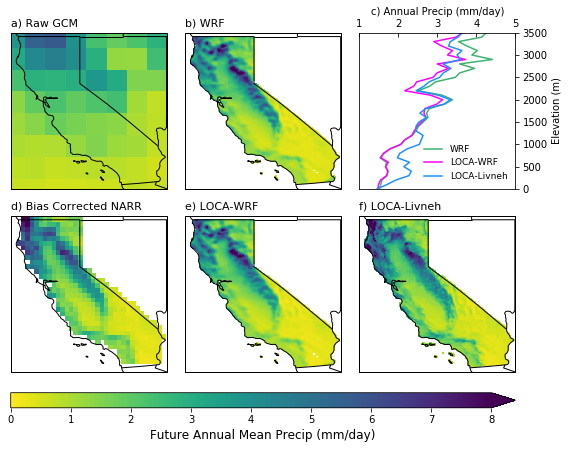

In [16]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# Same grid CA mask
mask_nc = netCDF4.Dataset(inv_dir+'same_grid_CA_mask.nc')
ca_mask = mask_nc.variables['landmask'][:,:]
mask_nc.close()

# Regridded WRF d02 topography
inv_nc = netCDF4.Dataset(inv_dir+'invariant_d02_same_grid.nc')
hgt = inv_nc.variables['HGT'][0,:,:]
inv_nc.close()

# Raw GCM (CNRM-CM5) [convert from mm/s to mm/day]
gcm_fut_nc = xr.open_dataset(data_dir+'cnrm_cm5_fut_2081-2100_annual_pr.nc')
gcm_fut_pr = gcm_fut_nc.variables['PRECIP'][:,:] * 60 * 60 * 24
gcm_lon = gcm_hist_nc['LON']
gcm_lat = gcm_hist_nc['LAT']

# WRF 
wrf_fut_nc = netCDF4.Dataset(data_dir+'wrf_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
same_lat = wrf_fut_nc.variables['lat'][:]
same_lon = wrf_fut_nc.variables['lon'][:]
wrf_fut_pr = wrf_fut_nc.variables['pr'][:,:]
wrf_fut_nc.close()

# NARR (BC) 
narr_fut_nc = netCDF4.Dataset(data_dir+'narr_forcing_livneh_fut_1991-2000_annual_pr_CA_mask.nc', 'r')
narr_fut_pr = narr_fut_nc.variables['pr'][:,:]
narr_lat = narr_fut_nc.variables['lat'][:]
narr_lon = narr_fut_nc.variables['lon'][:]
narr_fut_nc.close()

# WRF-LOCA
loca_wrf_fut_nc = netCDF4.Dataset(data_dir+'loca_wrf_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_wrf_fut_pr = loca_wrf_fut_nc.variables['pr'][:,:]
loca_wrf_fut_nc.close()

# LOCA-Livneh
loca_livneh_fut_nc = netCDF4.Dataset(data_dir+'loca_livneh_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_livneh_fut_pr = loca_livneh_fut_nc.variables['pr'][:,:]
loca_livneh_fut_nc.close()

# DataFrame of HGT, ca_mask, WRF, LOCA-WRF, and LOCA-Livneh
# for binning tmax changes by elevation band
df = pd.DataFrame()
df['HGT'] = hgt.flatten()
df['MASK'] = ca_mask.flatten()
df['WRF'] = wrf_fut_pr.flatten()
df['LOCA-WRF'] = loca_wrf_fut_pr.flatten()
df['LOCA-Livneh'] = loca_livneh_fut_pr.flatten()

# Retain only CA grid cells and non-NaNs
df = df[(df['MASK'] == 1) & (df['WRF'] > 0) & (df['LOCA-WRF'] > 0) & (df['LOCA-Livneh'] > 0)]

# Compute avg pr in 100m elevation intervals
wrf_list = []
loca_wrf_list = []
loca_livneh_list = []
for h in range(0,3600,100):
    temp_df = df[(df['HGT'] >= h) & (df['HGT'] < h + 100)].mean()
    wrf_list.append(temp_df['WRF'])
    loca_wrf_list.append(temp_df['LOCA-WRF'])
    loca_livneh_list.append(temp_df['LOCA-Livneh'])
    
# Figure ---
plot_ticks = np.linspace(0,8,17)

fig = plt.figure(figsize=(8,6))

# Raw GCM
ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) Raw GCM', loc='left', fontsize=11)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
plot1 = ax1.pcolormesh(gcm_lon, gcm_lat, gcm_fut_pr, 
                       transform=ccrs.PlateCarree(), 
                       cmap='viridis_r', vmin=0, vmax=8)
# Obtain the x and y limits to create a sqaure plot
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()
ax1.set_aspect(abs(x1-x0)/abs(y1-y0))


# WRF
ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('b) WRF', loc='left', fontsize=11)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
plot2 = ax2.pcolormesh(same_lon, same_lat, wrf_fut_pr,
                     transform=ccrs.PlateCarree(), 
                    vmin=0, vmax=8, cmap='viridis_r')
ax2.set_aspect(abs(x1-x0)/abs(y1-y0))
    
# Precip change vs. elevation 
elev_ticks = [tick for tick in range(0,3600,100)]
ax3 = fig.add_subplot(2, 3, 3, adjustable='box')
plot3 = ax3.plot(wrf_list, elev_ticks, color='mediumseagreen', label='WRF')
plot3 = ax3.plot(loca_wrf_list, elev_ticks, color='magenta', label='LOCA-WRF')
plot3 = ax3.plot(loca_livneh_list, elev_ticks, color='dodgerblue', label='LOCA-Livneh')
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.tick_params(axis='x', direction='in')
ax3.legend(loc='lower right', frameon=False, fontsize=9)
ax3.set_ylabel('Elevation (m)')
ax3.set_xlabel('c) Annual Precip (mm/day)')
ax3.set_ylim(0,3500)
ax3.set_xlim(1,5)
xx0,xx1 = ax3.get_xlim()
yy0,yy1 = ax3.get_ylim()
ax3.set_aspect(abs(xx1-xx0)/abs(yy1-yy0))

# NARR (BC)
ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('d) Bias Corrected NARR', loc='left', fontsize=11)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(cfeature.BORDERS)
ax4.set_extent([235.25,246,32.25,42.25])
plot4 = ax4.pcolormesh(narr_lon, narr_lat, narr_fut_pr, 
                       transform=ccrs.PlateCarree(), 
                       cmap='viridis_r', vmin=0, vmax=8)
ax4.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-WRF
ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('e) LOCA-WRF', loc='left', fontsize=11)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(cfeature.BORDERS)
ax5.set_extent([235.25,246,32.25,42.25])
plot5 = ax5.pcolormesh(same_lon, same_lat, loca_wrf_fut_pr,
                     transform=ccrs.PlateCarree(), 
                     vmin=0, vmax=8, cmap='viridis_r')
ax5.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-Livneh
ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('f) LOCA-Livneh', loc='left', fontsize=11)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(cfeature.BORDERS)
ax6.set_extent([235.25,246,32.25,42.25])
plot6 = ax6.pcolormesh(same_lon, same_lat, loca_livneh_fut_pr,
                        transform=ccrs.PlateCarree(), 
                        vmin=0, vmax=8, cmap='viridis_r')
ax6.set_aspect(abs(x1-x0)/abs(y1-y0))

fig.tight_layout(h_pad=-3)

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Colorbar for all panels
cbar_height = 0.035
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0-.02, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar = plt.colorbar(plot2, cax=cbar_ax, orientation='horizontal', extend='max')
# cbar.dividers.set_edgecolor('black')
# cbar.dividers.set_linewidth(1)
cbar.set_label('Future Annual Mean Precip (mm/day)', fontsize=12)

plt.savefig('/Users/nberg/projects/doe/figures/future_pr.jpeg', dpi=300, bbox_inches='tight')

### Supplemental Figure: Absolute changes in PR

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launche

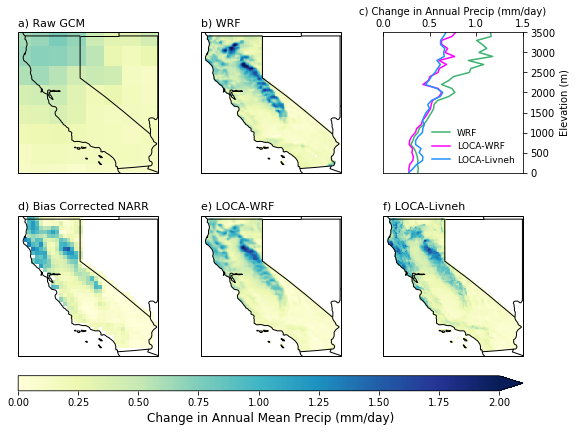

In [39]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# Same grid CA mask
mask_nc = netCDF4.Dataset(inv_dir+'same_grid_CA_mask.nc')
ca_mask = mask_nc.variables['landmask'][:,:]
mask_nc.close()

# Regridded WRF d02 topography
inv_nc = netCDF4.Dataset(inv_dir+'invariant_d02_same_grid.nc')
hgt = inv_nc.variables['HGT'][0,:,:]
inv_nc.close()

# Raw GCM (CNRM-CM5) placeholder
gcm_fut_nc = xr.open_dataset(data_dir+'cnrm_cm5_fut_2081-2100_annual_pr.nc')
gcm_hist_nc = xr.open_dataset(data_dir+'cnrm_cm5_hist_1981-2000_annual_pr.nc')
gcm_fut_pr = gcm_fut_nc.variables['PRECIP'][:,:]
gcm_hist_pr = gcm_hist_nc.variables['PRECIP'][:,:]
gcm_lon = gcm_fut_nc['LON']
gcm_lat = gcm_fut_nc['LAT']
gcm_change_pr = (gcm_fut_pr - gcm_hist_pr) * 60 * 60 * 24

# WRF 
wrf_fut_nc = netCDF4.Dataset(data_dir+'wrf_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
wrf_hist_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
wrf_fut_pr = wrf_fut_nc.variables['pr'][:,:]
same_lat = wrf_fut_nc.variables['lat'][:]
same_lon = wrf_fut_nc.variables['lon'][:]
wrf_hist_pr = wrf_hist_nc.variables['pr'][:,:]
wrf_change_pr = wrf_fut_pr - wrf_hist_pr
wrf_fut_nc.close()
wrf_hist_nc.close()

# NARR (BC) 
narr_fut_nc = netCDF4.Dataset(data_dir+'narr_forcing_livneh_fut_1991-2000_annual_pr_CA_mask.nc', 'r')
narr_hist_nc = netCDF4.Dataset(data_dir+'livneh_narr_grid_hist_1991-2000_annual_pr_CA_mask.nc', 'r')
narr_fut_pr = narr_fut_nc.variables['pr'][:,:]
narr_lat = narr_fut_nc.variables['lat'][:]
narr_lon = narr_fut_nc.variables['lon'][:]
narr_hist_pr = narr_hist_nc.variables['pr'][:,:]
narr_change_pr = narr_fut_pr - narr_hist_pr
narr_fut_nc.close()
narr_hist_nc.close()

# WRF-LOCA
loca_wrf_fut_nc = netCDF4.Dataset(data_dir+'loca_wrf_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_wrf_hist_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_wrf_fut_pr = loca_wrf_fut_nc.variables['pr'][:,:]
loca_wrf_hist_pr = loca_wrf_hist_nc.variables['pr'][:,:]
loca_wrf_change_pr = loca_wrf_fut_pr - loca_wrf_hist_pr
loca_wrf_fut_nc.close()
loca_wrf_hist_nc.close()

# LOCA-Livneh
loca_livneh_fut_nc = netCDF4.Dataset(data_dir+'loca_livneh_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_livneh_hist_nc = netCDF4.Dataset(data_dir+'loca_livneh_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_livneh_fut_pr = loca_livneh_fut_nc.variables['pr'][:,:]
loca_livneh_hist_pr = loca_livneh_hist_nc.variables['pr'][:,:]
loca_livneh_change_pr = loca_livneh_fut_pr - loca_livneh_hist_pr
loca_livneh_fut_nc.close()
loca_livneh_hist_nc.close()

# DataFrame of HGT, ca_mask, WRF, LOCA-WRF, and LOCA-Livneh
# for binning tmax changes by elevation band
df = pd.DataFrame()
df['HGT'] = hgt.flatten()
df['MASK'] = ca_mask.flatten()
df['WRF'] = wrf_change_pr.flatten()
df['LOCA-WRF'] = loca_wrf_change_pr.flatten()
df['LOCA-Livneh'] = loca_livneh_change_pr.flatten()

# Retain only CA grid cells and non-NaNs
df = df[(df['MASK'] == 1) & (df['WRF'] > 0) & (df['LOCA-WRF'] > 0) & (df['LOCA-Livneh'] > 0)]

# Compute avg pr change in 100m elevation intervals
wrf_list = []
loca_wrf_list = []
loca_livneh_list = []
for h in range(0,3600,100):
    temp_df = df[(df['HGT'] >= h) & (df['HGT'] < h + 100)].mean()
    wrf_list.append(temp_df['WRF'])
    loca_wrf_list.append(temp_df['LOCA-WRF'])
    loca_livneh_list.append(temp_df['LOCA-Livneh'])
    
# AVG, MIN, and MAX statistics
wrf_change_pr_real = wrf_change_pr[wrf_change_pr > -1000] # quick way to filter out nans
wrf_change_pr_avg, wrf_change_pr_min, wrf_change_pr_max = np.mean(wrf_change_pr_real),\
                                    np.min(wrf_change_pr_real), np.max(wrf_change_pr_real)
    
loca_wrf_change_pr_real = loca_wrf_change_pr[loca_wrf_change_pr > -100] # quick way to filter out nans
loca_wrf_change_pr_avg, loca_wrf_change_pr_min, loca_wrf_change_pr_max = np.mean(loca_wrf_change_pr_real), \
                    np.min(loca_wrf_change_pr_real), np.max(loca_wrf_change_pr_real)

loca_livneh_change_pr_real = loca_livneh_change_pr[loca_livneh_change_pr > -1000] # quick way to filter out nans
loca_livneh_change_pr_avg, loca_livneh_change_pr_min, loca_livneh_change_pr_max = np.mean(loca_livneh_change_pr_real), \
                    np.min(loca_livneh_change_pr_real), np.max(loca_livneh_change_pr_real)    

    
# Spatial correlation between WRF and LOCA-WRF for grid cells 1000-2000m
# df_1000 = df[(df['HGT'] >= 1000) & (df['HGT'] <= 2000.)]
# r_val, p_val = stats.pearsonr(df_1000['WRF'], df_1000['LOCA-WRF'])
# print('r = {0:.2f} p = {1:.2f}'.format(r_val, p_val))
    
# Figure ---
# plot_ticks = np.linspace(0,80,9)

fig = plt.figure(figsize=(8,6))

# Raw GCM
ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) Raw GCM', loc='left', fontsize=11)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
plot1 = ax1.pcolormesh(gcm_lon, gcm_lat, gcm_change_pr, 
                       transform=ccrs.PlateCarree(), 
                       cmap='YlGnBu', vmin=0, vmax=2)
# Obtain the x and y limits to create a sqaure plot
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()
ax1.set_aspect(abs(x1-x0)/abs(y1-y0))


# WRF
ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('b) WRF', loc='left', fontsize=11)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
# ax2.text(-119.5, 41, 'Avg = {0:.2f}'.format(wrf_change_pr_avg),
#         horizontalalignment='left',
#         transform=ccrs.Geodetic(),
#         fontsize=10)
# ax2.text(-119.5, 40, 'Min = {0:.2f}'.format(wrf_change_pr_min),
#         horizontalalignment='left',
#         transform=ccrs.Geodetic(),
#         fontsize=10)
# ax2.text(-119.5, 39, 'Max = {0:.2f}'.format(wrf_change_pr_max),
#         horizontalalignment='left',
#         transform=ccrs.Geodetic(),
#         fontsize=10)
plot2 = ax2.pcolormesh(same_lon, same_lat, wrf_change_pr,
                     transform=ccrs.PlateCarree(), 
                    vmin=0, vmax=2, cmap='YlGnBu')
ax2.set_aspect(abs(x1-x0)/abs(y1-y0))
    
# Precip change vs. elevation 
elev_ticks = [tick for tick in range(0,3600,100)]
ax3 = fig.add_subplot(2, 3, 3, adjustable='box')
plot3 = ax3.plot(wrf_list, elev_ticks, color='mediumseagreen', label='WRF')
plot3 = ax3.plot(loca_wrf_list, elev_ticks, color='magenta', label='LOCA-WRF')
plot3 = ax3.plot(loca_livneh_list, elev_ticks, color='dodgerblue', label='LOCA-Livneh')
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.tick_params(axis='x', direction='in')
ax3.legend(loc='lower right', frameon=False, fontsize=9)
ax3.set_ylabel('Elevation (m)')
ax3.set_xlabel('c) Change in Annual Precip (mm/day)')
ax3.set_ylim(0,3500)
ax3.set_xlim(0,1.5)
xx0,xx1 = ax3.get_xlim()
yy0,yy1 = ax3.get_ylim()
ax3.set_aspect(abs(xx1-xx0)/abs(yy1-yy0))

# NARR (BC)
ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('d) Bias Corrected NARR', loc='left', fontsize=11)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(cfeature.BORDERS)
ax4.set_extent([235.25,246,32.25,42.25])
plot4 = ax4.pcolormesh(narr_lon, narr_lat, narr_change_pr, 
                       transform=ccrs.PlateCarree(), 
                       cmap='YlGnBu', vmin=0, vmax=2)
ax4.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-WRF
ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('e) LOCA-WRF', loc='left', fontsize=11)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(cfeature.BORDERS)
ax5.set_extent([235.25,246,32.25,42.25])
# ax5.text(-119.5, 41, 'Avg = {0:.2f}'.format(loca_wrf_change_pr_avg),
#         horizontalalignment='left',
#         transform=ccrs.Geodetic(),
#         fontsize=10)
# ax5.text(-119.5, 40, 'Min = {0:.2f}'.format(loca_wrf_change_pr_min),
#         horizontalalignment='left',
#         transform=ccrs.Geodetic(),
#         fontsize=10)
# ax5.text(-119.5, 39, 'Max = {0:.2f}'.format(loca_wrf_change_pr_max),
#         horizontalalignment='left',
#         transform=ccrs.Geodetic(),
#         fontsize=10)
plot5 = ax5.pcolormesh(same_lon, same_lat, loca_wrf_change_pr, 
                     transform=ccrs.PlateCarree(), 
                       vmin=0, vmax=2, cmap='YlGnBu')
ax5.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-Livneh
ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('f) LOCA-Livneh', loc='left', fontsize=11)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(cfeature.BORDERS)
ax6.set_extent([235.25,246,32.25,42.25])
# ax6.text(-119.5, 41, 'Avg = {0:.2f}'.format(loca_livneh_change_pr_avg),
#         horizontalalignment='left',
#         transform=ccrs.Geodetic(),
#         fontsize=10)
# ax6.text(-119.5, 40, 'Min = {0:.2f}'.format(loca_livneh_change_pr_min),
#         horizontalalignment='left',
#         transform=ccrs.Geodetic(),
#         fontsize=10)
# ax6.text(-119.5, 39, 'Max = {0:.2f}'.format(loca_livneh_change_pr_max),
#         horizontalalignment='left',
#         transform=ccrs.Geodetic(),
#         fontsize=10)
plot6 = ax6.pcolormesh(same_lon, same_lat, loca_livneh_change_pr, 
                     transform=ccrs.PlateCarree(), 
                       vmin=0, vmax=2, cmap='YlGnBu')
ax6.set_aspect(abs(x1-x0)/abs(y1-y0))

fig.tight_layout(h_pad=-3)

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Colorbar for all panels
cbar_height = 0.035
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar = plt.colorbar(plot2, cax=cbar_ax, orientation='horizontal', extend='max')
# cbar.dividers.set_edgecolor('black')
# cbar.dividers.set_linewidth(1)
cbar.set_label('Change in Annual Mean Precip (mm/day)', fontsize=12)

plt.savefig('/Users/nberg/projects/doe/figures/absolute_change_pr.jpeg', dpi=300, bbox_inches='tight')